In [2]:
from docopt import docopt
from federated_learning.FederatedLearning import FederatedLearning
import logging
import random
import torch
import ast
import sys
import yaml
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler as ss

Falling back to insecure randomness since the required custom op could not be found for the installed version of TensorFlow. Fix this by compiling custom ops. Missing file was '/home/ubuntu/.local/lib/python3.6/site-packages/tf_encrypted/operations/secure_random/secure_random_module_tf_1.15.3.so'


In [3]:
model_path_ = "data/server_model_7"
trained_server_model = torch.load(model_path_)
params = [None for i in range(8)]
idx = 0
for param in trained_server_model.parameters():
    params[idx] = param.detach().numpy().reshape(-1, 1)
    print("params[{}]: {}".format(idx, params[idx].shape))
    idx += 1

params[0]: (500, 1)
params[1]: (20, 1)
params[2]: (25000, 1)
params[3]: (50, 1)
params[4]: (400000, 1)
params[5]: (500, 1)
params[6]: (5000, 1)
params[7]: (10, 1)


In [81]:
params_flattened = np.array([item for sublist in params for item in sublist]).reshape(1, -1)
params_samples = np.concatenate((params_flattened, params_flattened))
print(params_samples.shape)
x_ = ss().fit_transform(params_samples)
pca = PCA(n_components=2)
x = pca.fit_transform(x_)
x

(2, 431080)


/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/decomposition/_pca.py:463: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


array([[0., 0.],
       [0., 0.]], dtype=float32)

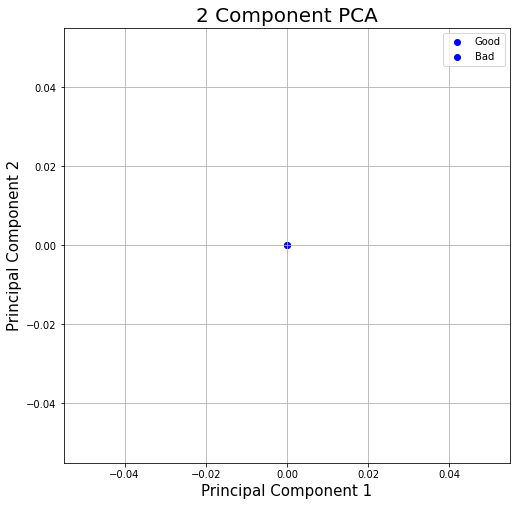

In [85]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Good', 'Bad']
colors = ['r', 'b']
# for target, color in zip(targets,colors):
#     indicesToKeep = finalDf['target'] == target
for point in x:
    ax.scatter(point[0], point[1], c = 'b')
ax.legend(targets)
ax.grid()

In [65]:
data = np.array([[0, 0, 3, 6], [5, 0, 1, 8]])
print(data.shape)
y_ = ss().fit_transform(data)
y = pca.fit_transform(y_)
y

(2, 4)


array([[ 1.73205081e+00,  1.56648701e-17],
       [-1.73205081e+00,  1.56648701e-17]])